In [18]:
from stldecompose import decompose
import matplotlib.pyplot as plt
import time
from sklearn.metrics import classification_report
from itertools import chain

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from time import time
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [3]:
path = "C:/USERS/OPTIMUSPRIME/Desktop/Studia/Magisterka/Faints-Prediction/"
BP_filename = "BP.csv"
HR_filename = "HR.csv"

train_indices =  [str(indx[0]) for indx in pd.read_csv(path + "DATA/training_set.txt", header=None).values.tolist()]
test_indices =  [str(indx[0]) for indx in pd.read_csv(path + "DATA/test_set.txt", header=None).values.tolist()]
validation_indices =  [str(indx[0]) for indx in pd.read_csv(path + "DATA/validation_set.txt", header=None).values.tolist()]
all_indices = train_indices + test_indices + validation_indices

In [4]:
BP_data = pd.read_csv(path + "DATA/" + BP_filename, low_memory=False)[all_indices]
HR_data = pd.read_csv(path + "DATA/" + HR_filename, low_memory=False)[all_indices]
labels = {col: BP_data[col].iloc[0] for col in BP_data}

BP_max_value = BP_data.iloc[1:].astype(np.float32).max().max()
BP_min_value = BP_data.iloc[1:].astype(np.float32).min().min()
HR_max_value = HR_data.iloc[1:].astype(np.float32).max().max()
HR_min_value = HR_data.iloc[1:].astype(np.float32).min().min()

BP_scaler = MinMaxScaler().fit(np.array([BP_min_value, BP_max_value]).reshape(-1,1))
HR_scaler = MinMaxScaler().fit(np.array([HR_min_value, HR_max_value]).reshape(-1,1))

BP_data_scaled = BP_data.iloc[1:].astype(np.float32).copy()
BP_data_scaled[all_indices] = BP_scaler.transform(BP_data_scaled[all_indices])


HR_data_scaled = HR_data.iloc[1:].astype(np.float32).copy()
HR_data_scaled[all_indices] = HR_scaler.transform(HR_data_scaled[all_indices])

In [5]:
# SMOOTHING
BP_data_scaled_averaged = BP_data_scaled.rolling(60).mean()
HR_data_scaled_averaged = HR_data_scaled.rolling(60).mean()

# Parameters Optimisation

In [6]:
indexes = ['1', '92', '110', '158', '286', '295', '375', '393', '460', '501', '606', '658', '675']
# indexes = ['375', '393']

In [7]:
def label_func(index, start, end, color):
    for i in range(start, end):
        BP_HR_validation_labels[index][i] = color

BP_HR_validation_labels = dict()
BP_validation = dict()
HR_validation = dict()
for index in indexes:
    BPx = np.array(BP_data_scaled_averaged[index])
    HRx = np.array(HR_data_scaled_averaged[index])
    BPx = BPx[~np.isnan(BPx)]
    HRx = HRx[~np.isnan(HRx)]
    BPx = BPx[:-(BPx.shape[0] % 32)]
    HRx = HRx[:-(HRx.shape[0] % 32)]
    BPxs = np.array(np.array_split(BPx, int(len(BPx)/32)))
    HRxs = np.array(np.array_split(HRx, int(len(HRx)/32)))
    BP_HR_validation_labels[index] = np.array(['g']*len(BPxs))
    BP_validation[index] = BPxs
    HR_validation[index]= HRxs

In [8]:
index = '1'
label_func('1', 80, 81, 'r')
label_func('1', 81, 107, 'r')
label_func('1', 107, 111, 'r')
index = '375'
label_func('375', 40, 47, 'r')
label_func('375', 129, 133, 'r')
label_func('375', 133, 141, 'r')
label_func('375', 141, 144, 'r')
label_func('375', 162, 168, 'r')
index = '393' 
label_func('393', 31, 32, 'r')
label_func('393', 32, 36, 'r')
label_func('393', 36, 37, 'r')
index = '92' 
label_func('92', 41, 49, 'r')
label_func('92', 140, 143, 'r')
label_func('92', 143, 154, 'r')
index = '110' 
label_func('110', 119, 120, 'r')
label_func('110', 120, 123, 'r')
label_func('110', 123, 125, 'r')
index = '158' 
label_func('158', 24, 28, 'r')
label_func('158', 115, 116, 'r')
label_func('158', 116, 122, 'r')
label_func('158', 122, 123, 'r')
index = '286' 
label_func('286', 61, 62, 'r')
label_func('286', 62, 65, 'r')
label_func('286', 65, 67, 'r')
label_func('286', 123, 124, 'r')
label_func('286', 124, 129, 'r')
label_func('286', 129, 131, 'r')
label_func('286', 131, 134, 'r')
index = '295' 
label_func('295', 131, 134, 'r')
label_func('295', 134, 144, 'r')
index = '460' 
label_func('460', 49, 50, 'r')
label_func('460', 50, 58, 'r')
label_func('460', 58, 59, 'r')
index = '501'
label_func('501', 119, 120, 'r')
label_func('501', 120, 124, 'r')
label_func('501', 124, 125, 'r')
index = '606'
label_func('606', 59, 61, 'r')
label_func('606', 61, 70, 'r')
label_func('606', 70, 72, 'r')
index = '658', 
label_func('658', 35, 36, 'r')
label_func('658', 36, 53, 'r')
label_func('658', 53, 55, 'r')
index ='675', 
label_func('675', 80, 82, 'r')
label_func('675', 82, 101, 'r')
label_func('675', 101, 104, 'r')

In [15]:
# 320 bad      375 good
def sample_timeseries(x):
    x = np.array(x)
    x = x[~np.isnan(x)]
    if x.shape[0] % 32 != 0:
        x = x[:-(x.shape[0] % 32)]
    return np.array(np.array_split(x, int(len(x)/32)))

def detrend(observed):
    indexes = [x for x in range(len(observed))]
    trend = lowess(observed, indexes, frac=0.6, delta=0.1 * len(observed), return_sorted=False)
    return observed - trend

def classifier(HR, BP, i, a, b):
    HR_resid = detrend(HR[:i+1].flatten())
    BP_resid = detrend(BP[:i+1].flatten())
    HR_anomaly_score = np.abs(np.mean(HR_resid[-32:]))
    BP_anomaly_score = np.abs(np.mean(BP_resid[-32:]))
    if HR_anomaly_score > a or BP_anomaly_score > b:
        return 'r'
    else:
        return 'g'

In [22]:
classification_reports = dict()

def calc_accuracy_for_params(params):
    start = time.time()
    a, b = params
    y_pred = np.array([])
    
    for i in indexes:
        HR = sample_timeseries(HR_data_scaled_averaged[i])
        BP = sample_timeseries(BP_data_scaled_averaged[i]) 
        for HRv, BPv, j in zip(HR, BP, range(len(BP))):       
            severity = classifier(HR, BP, j, a, b)
            y_pred = np.append(y_pred, severity)
            
    y_true = np.array(list(chain(*BP_HR_validation_labels.values())), dtype=str)    
    class_report = classification_report(y_true, y_pred, output_dict=True)
    acc = class_report['accuracy']
    red_f1 = class_report['r']['f1-score']
    green_f1 = class_report['g']['f1-score']
    classification_reports[(a, b)] = class_report
    print(f"Accuracy: {acc:.4f}, Green F1: {green_f1:.4f}, Red F1: {red_f1:.4f}, a: {a:.3f}, b: {b:.3f}, time:{(time.time() - start):.2f}s")

In [25]:
aa = np.array(range(20, 85, 5)) / 1000
bb = np.array(range(20, 85, 5)) / 1000
print(aa)
print(bb)

[0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06  0.065 0.07  0.075
 0.08 ]
[0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06  0.065 0.07  0.075
 0.08 ]


In [26]:
for b in bb:
    for a in aa:
        calc_accuracy_for_params([a, b])

Accuracy: 0.7243, Green F1: 0.8153, Red F1: 0.4562, a: 0.020, b: 0.020, time:24.03s
Accuracy: 0.7525, Green F1: 0.8375, Red F1: 0.4817, a: 0.025, b: 0.020, time:23.75s
Accuracy: 0.7714, Green F1: 0.8520, Red F1: 0.4970, a: 0.030, b: 0.020, time:23.78s
Accuracy: 0.7801, Green F1: 0.8586, Red F1: 0.5053, a: 0.035, b: 0.020, time:23.73s
Accuracy: 0.7868, Green F1: 0.8638, Red F1: 0.5100, a: 0.040, b: 0.020, time:23.85s
Accuracy: 0.7909, Green F1: 0.8668, Red F1: 0.5133, a: 0.045, b: 0.020, time:23.76s
Accuracy: 0.7929, Green F1: 0.8684, Red F1: 0.5142, a: 0.050, b: 0.020, time:23.71s
Accuracy: 0.7942, Green F1: 0.8696, Red F1: 0.5127, a: 0.055, b: 0.020, time:23.77s
Accuracy: 0.7942, Green F1: 0.8697, Red F1: 0.5112, a: 0.060, b: 0.020, time:23.60s
Accuracy: 0.7956, Green F1: 0.8706, Red F1: 0.5128, a: 0.065, b: 0.020, time:23.64s
Accuracy: 0.7956, Green F1: 0.8707, Red F1: 0.5113, a: 0.070, b: 0.020, time:23.86s
Accuracy: 0.7969, Green F1: 0.8717, Red F1: 0.5129, a: 0.075, b: 0.020, time

Accuracy: 0.8985, Green F1: 0.9411, Red F1: 0.6326, a: 0.055, b: 0.055, time:26.29s
Accuracy: 0.9005, Green F1: 0.9424, Red F1: 0.6355, a: 0.060, b: 0.055, time:26.24s
Accuracy: 0.9032, Green F1: 0.9440, Red F1: 0.6418, a: 0.065, b: 0.055, time:25.96s
Accuracy: 0.9032, Green F1: 0.9441, Red F1: 0.6382, a: 0.070, b: 0.055, time:26.31s
Accuracy: 0.9045, Green F1: 0.9449, Red F1: 0.6414, a: 0.075, b: 0.055, time:27.29s
Accuracy: 0.9038, Green F1: 0.9447, Red F1: 0.6324, a: 0.080, b: 0.055, time:26.62s
Accuracy: 0.8130, Green F1: 0.8838, Red F1: 0.5223, a: 0.020, b: 0.060, time:27.52s
Accuracy: 0.8399, Green F1: 0.9027, Red F1: 0.5492, a: 0.025, b: 0.060, time:26.80s
Accuracy: 0.8662, Green F1: 0.9201, Red F1: 0.5880, a: 0.030, b: 0.060, time:25.22s
Accuracy: 0.8803, Green F1: 0.9293, Red F1: 0.6114, a: 0.035, b: 0.060, time:25.06s
Accuracy: 0.8890, Green F1: 0.9350, Red F1: 0.6224, a: 0.040, b: 0.060, time:24.39s
Accuracy: 0.8937, Green F1: 0.9380, Red F1: 0.6274, a: 0.045, b: 0.060, time

In [22]:
ind = '375'
HR_sampled = sample_timeseries(HR_data_scaled_averaged[ind])
BP_sampled = sample_timeseries(BP_data_scaled_averaged[ind])

(0, 1)

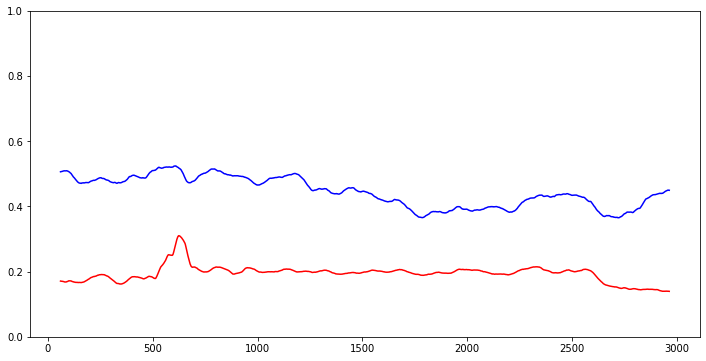

In [23]:
plt.figure(figsize=(12,6))
plt.plot(HR_data_scaled_averaged[ind], 'r')
plt.plot(BP_data_scaled_averaged[ind], 'b')
plt.ylim(0,1)

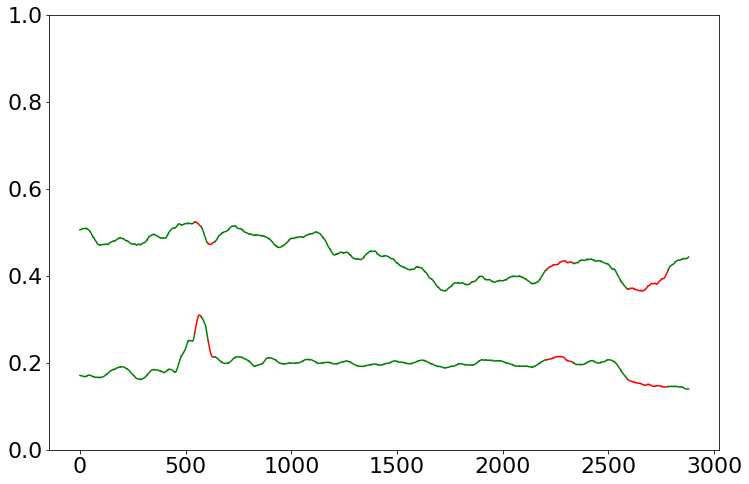

In [47]:
plot_classified_timeseries_without_labels(BP_sampled, HR_sampled, classifier)

In [32]:
n = 620
decomp = decompose(np.array(HR_data_scaled_averaged[ind][:n]), period=1)
X_index = range(len(HR_data_scaled_averaged[ind][:n]))
decomp.resid.size

620

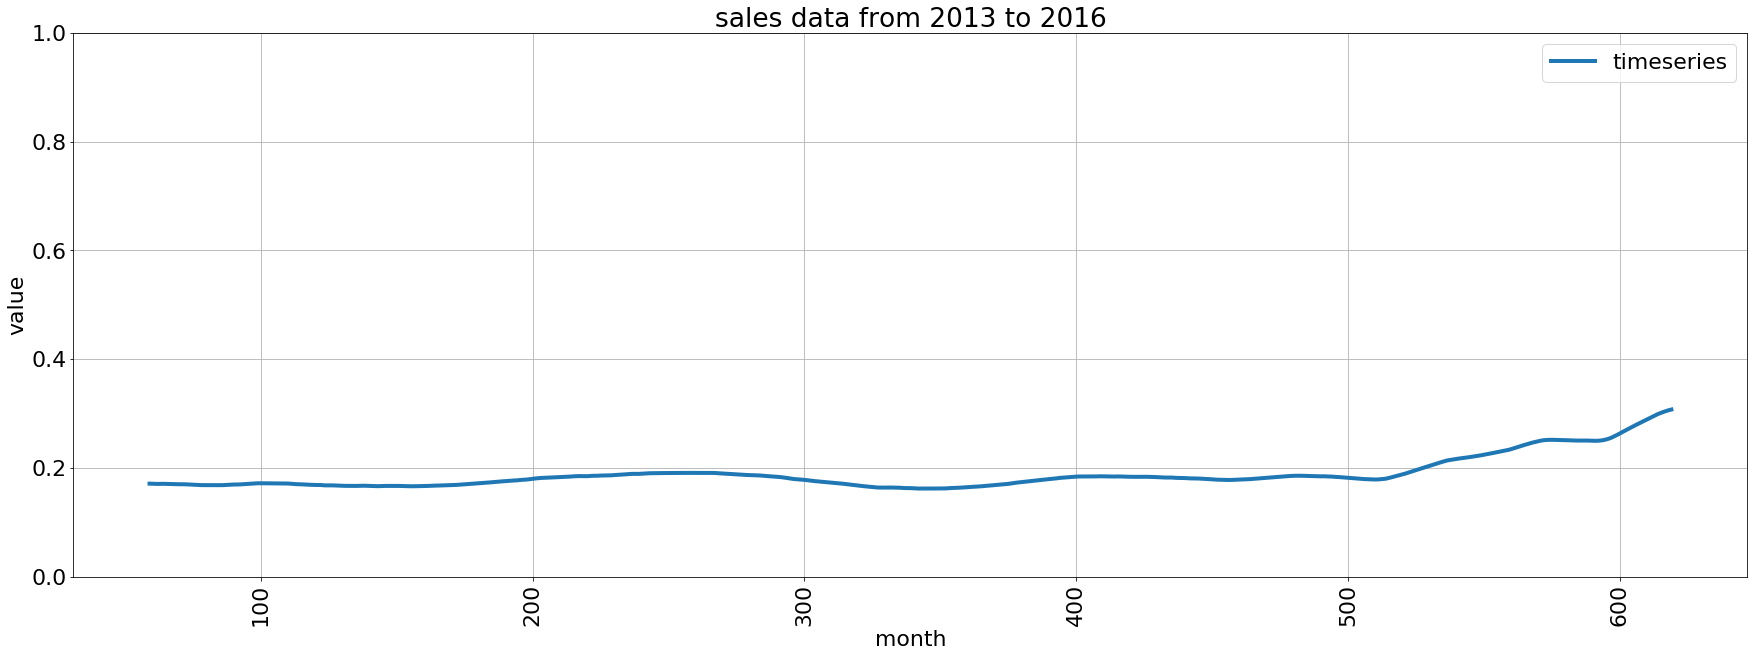

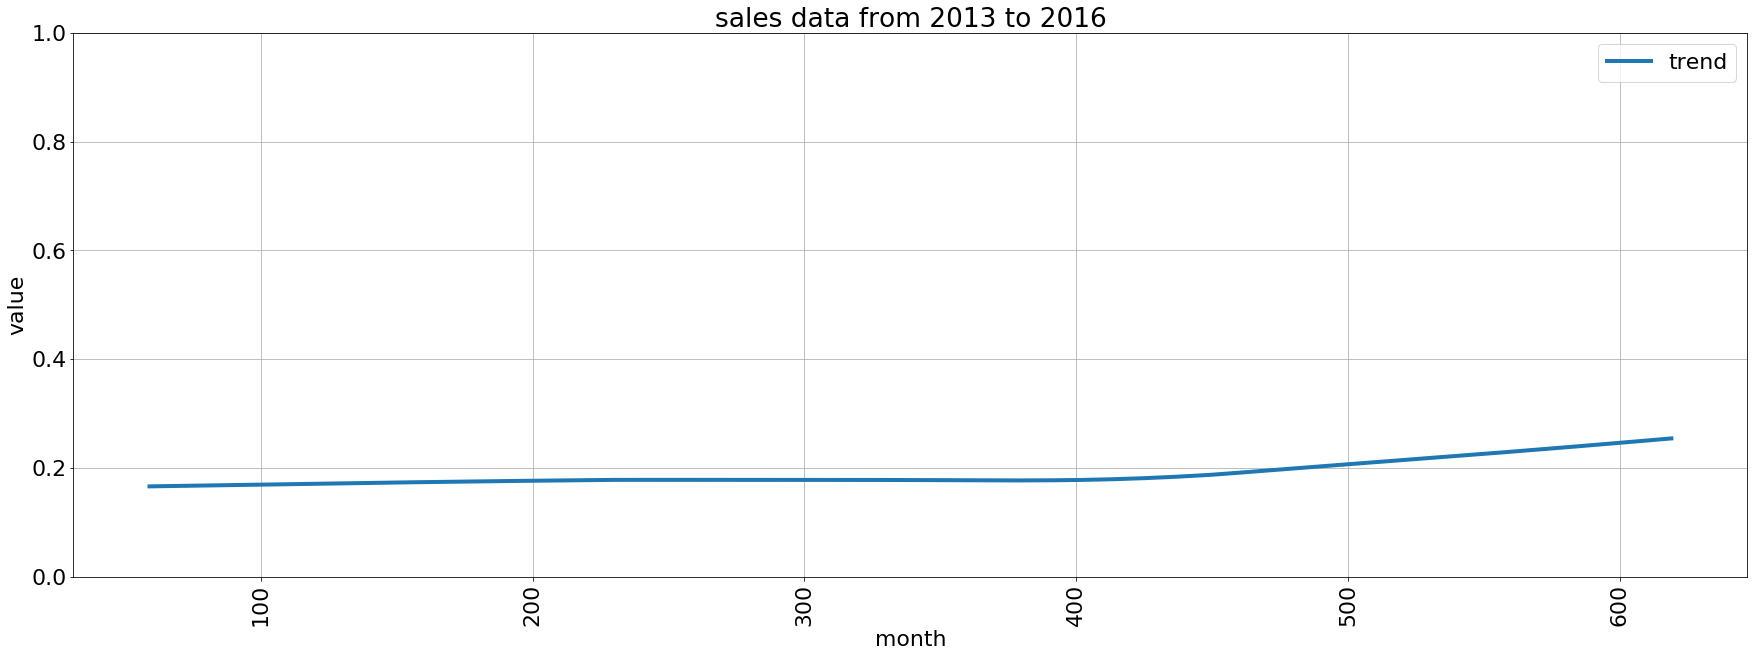

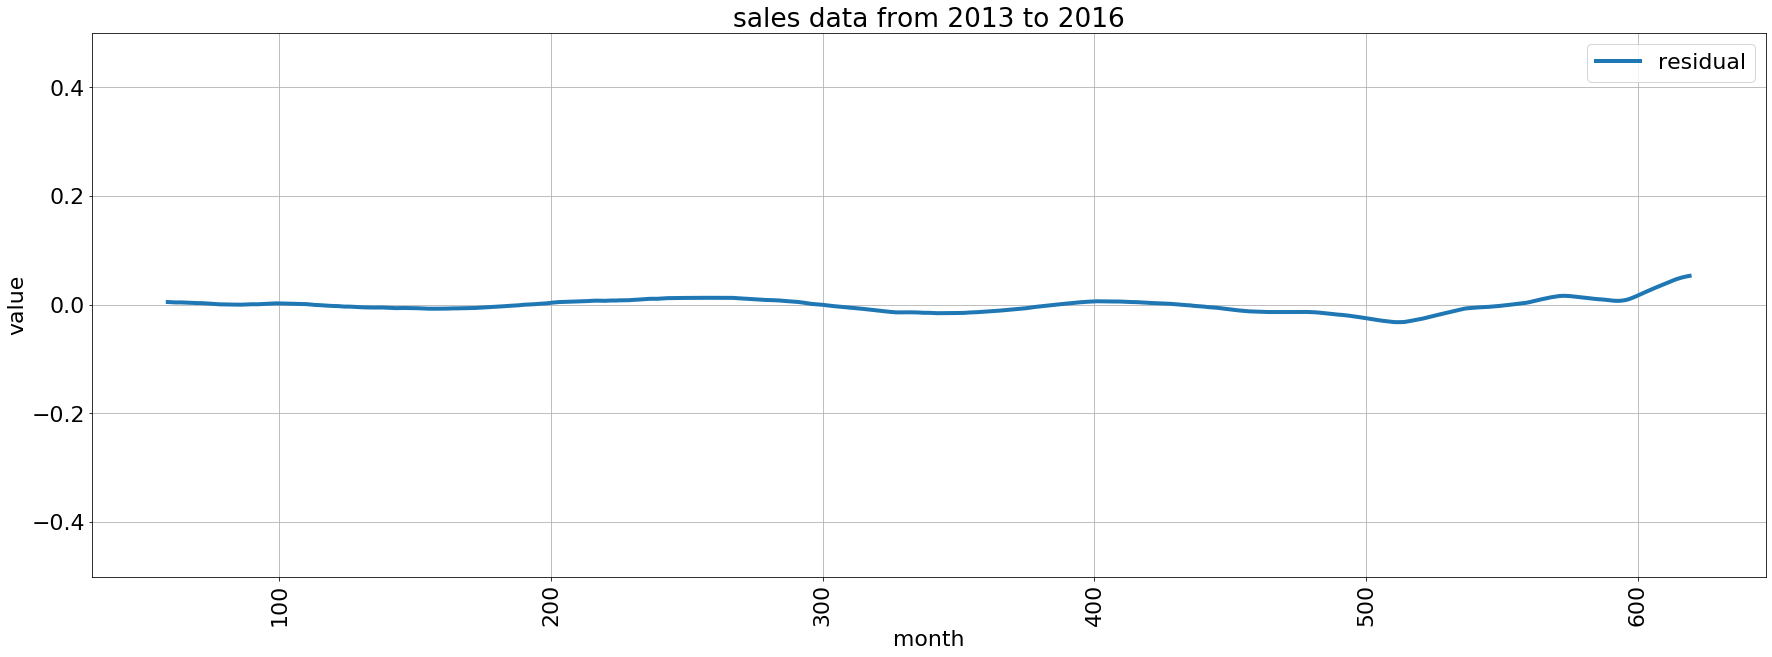

In [33]:
plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})
plt.grid()
plt.plot(X_index, decomp.observed, marker='', linestyle='-', label='timeseries', linewidth=4)
plt.title("sales data from 2013 to 2016")
plt.xlabel("month")
plt.ylabel("value")
plt.xticks(rotation=90)
plt.legend()
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})
plt.grid()
plt.plot(X_index, decomp.trend, marker='', linestyle='-', label='trend', linewidth=4)
plt.title("sales data from 2013 to 2016")
plt.xlabel("month")
plt.ylabel("value")
plt.xticks(rotation=90)
plt.legend()
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})
plt.grid()
plt.plot(X_index, decomp.resid, marker='', linestyle='-', label='residual', linewidth=4)
plt.title("sales data from 2013 to 2016")
plt.xlabel("month")
plt.ylabel("value")
plt.xticks(rotation=90)
plt.legend()
plt.ylim(-0.5,0.5)
plt.show()

In [34]:
def classifier(HR, BP, i):
    HR_decomp = decompose(HR[:i+1].flatten(), 1)
    BP_decomp = decompose(BP[:i+1].flatten(), 1)
    HR_anomaly_score = np.mean(HR_decomp.resid[-32:])
    BP_anomaly_score = np.mean(BP_decomp.resid[-32:])
    if HR_anomaly_score > 0.05 or BP_anomaly_score > 0.05:
        return 'r'
    else:
        return 'g'
        


def plot_classified_timeseries_without_labels(BP_sample, HR_sample, classifier):
    BP = sample_timeseries(BP_sample)
    HR = sample_timeseries(HR_sample)
    t = 0
    BP_last_elem = None
    plt.figure(figsize=(12,8))
    for HRv, BPv, i in zip(HR, BP, range(len(BP))):
        if BP_last_elem == None:
            c = classifier(BP, HR, i)
            plt.plot(range(t, t + len(HRv)), HRv, color=f'{c}', linestyle='-')
            plt.plot(range(t, t + len(BPv)), BPv, color=f'{c}', linestyle='-')
            t += len(BPv)
        else:
            time_range = range(t-1, t + len(BPv)) 
            BPv = np.concatenate(([BP_last_elem], BPv))
            HRv = np.concatenate(([HR_last_elem], HRv))
            c = classifier(HRv, BPv)
            plt.plot(time_range, HRv, color=f'{c}', linestyle='-')
            plt.plot(time_range, BPv, color=f'{c}', linestyle='-')
            t += len(BPv) - 1
        BP_last_elem = BPv[-1]
        HR_last_elem = HRv[-1] 


    plt.title(labels[ind])
    plt.ylim((0,1))

In [ ]:
plot_classified_timeseries_without_labels()

In [8]:
aa = np.array([[1,2],[3,4],[5,6]])

In [9]:
aa.shape

(3, 2)

In [12]:
aa[:2].flatten()

array([1, 2, 3, 4])